<a href="https://colab.research.google.com/github/leticiasbm/DSAnalytics/blob/Sprint-01/MVP_Let%C3%ADcia_Santos_Batista_de_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Letícia Santos Batista de Melo

**Matrícula:** 4052025000754

**Dataset:** [Thyroid Disease - Doença da Tireoide](https://archive.ics.uci.edu/dataset/102/thyroid+disease)


# Descrição do Problema

O conjunto de dados "Thyroid Disease" (Doença de Tireoide), especialmente o arquivo sick.data, é um conjunto multivariado real com informações clínicas detalhadas, coletadas de pacientes com suspeita ou diagnóstico de disfunções tireoidianas. Este dataset visa diagnosticar automaticamente doenças da tireoide, como hipotireoidismo, hipertireoidismo, tireoide normal e outras condições, a partir de:



*   Exames hormonais (TSH, T3, T4);
*   Informações clínicas e comportamentais (gravidez, medicações, cirurgias);
* Dados demográficos (idade, sexo);
* Sinais indiretos de comprometimento endócrino (bócio, uso de medicações com lítio, etc.).











## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Problemas de tireoide são mais recorrentes em determinado gênero/idade? Mulheres são mais propensas a desenvolver problemas de tireoide?

- Há alguma relação entre a presença de doenças psiquiátricas e disfunções tireoidianas?

- Pacientes com TSH elevado têm maior possibilidade de serem diagnosticados com hipotireoidismo? Quais outros hormônios podem contribuir para esse diagnóstico?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é diagnosticar se há ou não disfunção tireoidiana (normal, doente) em determinado paciente.

## Seleção de Dados

O *dataset "Thyroid Disease"* (Doença de Tireoide) é um conjunto de dados disponível no UC Irvine Machine Learning Repository. Para sua utilização, é necessário baixar o arquivo .data disponível e importá-lo para o Colab.

## Atributos do Dataset

O *dataset "Thyroid Disease"* (Doença de Tireoide) contém 2799 amostras e 30 atributos, sendo:

Demográficos:

- **Age** (idade do paciente);
- **Sex** (sexo biológico do paciente - feminino/masculino);

Clínicos e Hormonais:

- **On_Thyroxine** (paciente faz uso de T4? - True/False);
- **Query_On_Thyroxine** (médico está considerando prescrever T4? - True/False);
- **On_Antithyroid_Medication** (usa medicamentos para reduzir atividade da tireoide? - True/False);
- **Sick** (está doente com alguma condição além da tireoidiana? - True/False);
- **Pregnant** (paciente está grávida? - True/False);
- **Thyroid_Surgery** (já passou por cirurgiana tireoide? - True/False);
- **I131_Treatment** (tratamento com iodo radioativo? - True/False);
- **Query_Hypothyroid** (suspeita de hipotireoidismo? - True/False);
- **Query_Hyperthyroid** (suspeita de hipertireoidismo? - True/False);
- **Lithium** (usa lítio? - True/False);
- **Goitre** (presença de bócio? - True/False);
- **Tumor** (possui algum tumor? - True/False);
- **Hypopituitary** (possui disfunção na hipófise? - True/False);
- **Psych** (possui histórico psiquiátrico? - True/False);
- **TSH** (nível do hormônio TSH (Hormônio Estimulante da Tireoide) - µIU/mL);
- **T3** (nível do hormônio T3 (Triiodotironina) - ng/dL);
- **TT4** (nível do hormônio T4 (Tiroxina Total) - µg/dL);
- **T4U** (índice de captação da tiroxina);
- **FTI** (índice de T4 Livre - ng/dL);
- **TBG** (globulina ligadora de tiroxina - mg/L);
- **Referral_Source** (fonte de encaminhamento médico - hospital/autoencaminhado/médico);
- **Class** (diagnóstico final - negativo/doente).


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do *dataset* a partir do GitHub.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

In [2]:
# Carregamento do conjunto de dados a partir do GitHub

!git clone --branch Sprint-01 https://github.com/leticiasbm/DSAnalytics.git

Cloning into 'DSAnalytics'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 4.36 MiB | 3.34 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
# Importando conjunto de dados como .csv

data = pd.read_csv("/content/DSAnalytics/sick.data", sep = ",", encoding = "ISO-8859-1", decimal = ".")

In [4]:
# Armazenando o conjunto de dados em um DataFrame

dataframe = pd.DataFrame(data)

# Adicionando o nome das colunas ao DataFrame

dataframe.columns = ["Age", "Sex", "On_Thyroxine", "Query_On_Thyroxine", "On_Antithyroid_Medication", "Sick",
                     "Pregnant", "Thyroid_Surgery", "I131_Treatment", "Query_Hypothyroid", "Query_Hyperthyroid",
                     "Lithium", "Goitre", "Tumor", "Hypopituitary", "Psych", "TSH_Measured", "TSH", "T3_Measured", "T3",
                      "TT4_Measured", "TT4", "T4U_Measured", "T4U", "FTI_Measured", "FTI", "TBG_Measured", "TBG",
                      "Referral_Source", "Class"]
dataframe.head(5)

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Referral_Source,Class
0,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434


Como algumas colunas do DataFrame possuem valores binários, essas colunas terão seu tipo alterado para Boolean e os valores "f" e "t" serão alterados para False e True, respectivamente.

Além disso, pode-se perceber que existem muitos valores faltantes no dataset, marcados como "?". Esses valores serão substituídos por np.NaN neste momento.

In [5]:
# Substituindo valores das variáveis binárias

dataframe = dataframe.replace("f", False)
dataframe = dataframe.replace("t", True)

# Substituindo valores ausentes por np.nan

dataframe = dataframe.replace("?", np.nan)
dataframe.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Referral_Source,Class
0,23,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4.1,True,2,True,102,False,NaN,False,NaN,False,NaN,other,negative.|1442
1,46,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.98,False,NaN,True,109,True,0.91,True,120,False,NaN,other,negative.|2965
2,70,F,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.16,True,1.9,True,175,False,NaN,False,NaN,False,NaN,other,negative.|806
3,70,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.72,True,1.2,True,61,True,0.87,True,70,False,NaN,SVI,negative.|2807
4,18,F,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.03,False,NaN,True,183,True,1.3,True,141,False,NaN,other,negative.|3434


Na última coluna do DataFrame, "Class", deixaremos apenas o diagnóstico, sendo removidas as demais informações.

In [6]:
# Mantendo apenas a palavra do diagnóstico na coluna "class"

dataframe["Class"] = dataframe["Class"].str.split("|").str[0]
dataframe["Class"] = dataframe["Class"] .str.rstrip('.')
dataframe.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Referral_Source,Class
0,23,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4.1,True,2,True,102,False,NaN,False,NaN,False,NaN,other,negative
1,46,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.98,False,NaN,True,109,True,0.91,True,120,False,NaN,other,negative
2,70,F,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.16,True,1.9,True,175,False,NaN,False,NaN,False,NaN,other,negative
3,70,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.72,True,1.2,True,61,True,0.87,True,70,False,NaN,SVI,negative
4,18,F,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.03,False,NaN,True,183,True,1.3,True,141,False,NaN,other,negative


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o *dataset "Thyroid Disease"* (Doença de Tireoide), visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O *dataset* possui 2799 instâncias (observações). Possui 30 variáveis do tipo *object*. Visualizando os dados, sabe-se que, dessas, 7 são numéricas do tipo *float*, 20 são do tipo *bool* e 3 variáveis são categóricas do tipo *object*.

As variáveis que não apresentam o tipo de dado correto serão alteradas neste tópico.

In [7]:
print(f"Total de instâncias: {len(dataframe)}")
print("\nTipos de dados por coluna:")
print(dataframe.info())

Total de instâncias: 2799

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2798 non-null   object
 1   Sex                        2689 non-null   object
 2   On_Thyroxine               2799 non-null   object
 3   Query_On_Thyroxine         2799 non-null   object
 4   On_Antithyroid_Medication  2799 non-null   object
 5   Sick                       2799 non-null   object
 6   Pregnant                   2799 non-null   object
 7   Thyroid_Surgery            2799 non-null   object
 8   I131_Treatment             2799 non-null   object
 9   Query_Hypothyroid          2799 non-null   object
 10  Query_Hyperthyroid         2799 non-null   object
 11  Lithium                    2799 non-null   object
 12  Goitre                     2799 non-null   object
 13  Tumor    

In [8]:
# Alterando o tipo de dado dos atributos

dataframe = dataframe.astype({"Age" : float, "On_Thyroxine" : bool, "Query_On_Thyroxine" : bool, "On_Antithyroid_Medication" : bool,
                              "Sick" : bool, "Pregnant" : bool, "Thyroid_Surgery" : bool, "I131_Treatment" : bool, "Query_Hypothyroid" : bool,
                              "Query_Hyperthyroid" : bool, "Lithium" : bool, "Goitre" : bool, "Tumor" : bool, "Hypopituitary" : bool, "Psych" : bool,
                              "TSH_Measured" : bool, "T3_Measured" : bool, "TT4_Measured" : bool, "T4U_Measured" : bool, "FTI_Measured" : bool, "TBG_Measured" : bool,
                              "TSH" : float, "T3" : float, "TT4" : float, "T4U" : float, "FTI" : float, "TBG" : float})

print(dataframe.dtypes)

Age                          float64
Sex                           object
On_Thyroxine                    bool
Query_On_Thyroxine              bool
On_Antithyroid_Medication       bool
Sick                            bool
Pregnant                        bool
Thyroid_Surgery                 bool
I131_Treatment                  bool
Query_Hypothyroid               bool
Query_Hyperthyroid              bool
Lithium                         bool
Goitre                          bool
Tumor                           bool
Hypopituitary                   bool
Psych                           bool
TSH_Measured                    bool
TSH                          float64
T3_Measured                     bool
T3                           float64
TT4_Measured                    bool
TT4                          float64
T4U_Measured                    bool
T4U                          float64
FTI_Measured                    bool
FTI                          float64
TBG_Measured                    bool
T

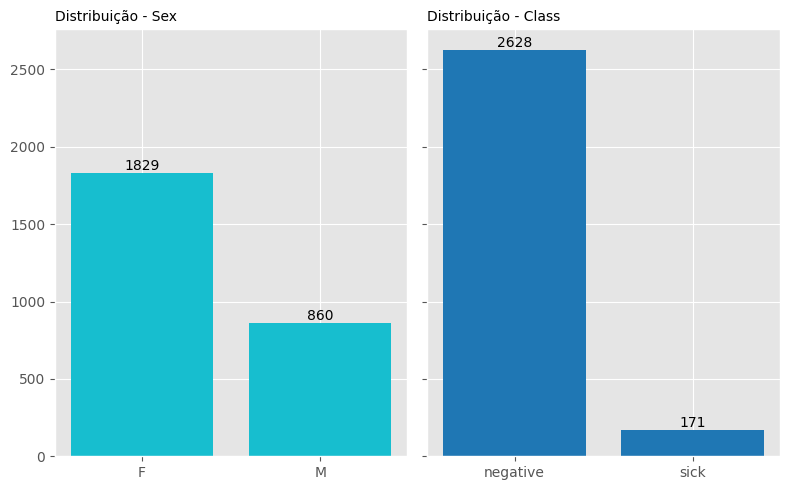

In [9]:
# Avaliando a distribuição das instâncias nas variáveis categóricas

# Configuração da paleta de cores
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 5), sharey = True)

sex = ax[0].bar(dataframe["Sex"].value_counts().index, dataframe["Sex"].value_counts().values, color = "tab:cyan")
ax[0].set_title("Distribuição - Sex", loc = "left", fontsize = 10)
ax[0].bar_label(sex, fmt = "%.0f")

cl = ax[1].bar(dataframe["Class"].value_counts().index, dataframe["Class"].value_counts(), color = "tab:blue")
ax[1].set_title("Distribuição - Class", loc = "left", fontsize = 10)
ax[1].bar_label(cl, fmt = "%.0f")

plt.tight_layout()
plt.show()

Os gráficos de barra mostram que no conjunto de dados há maior prevalescência de amostras do sexo feminino e de diagnósticos negativos para doenças tireoidianas.

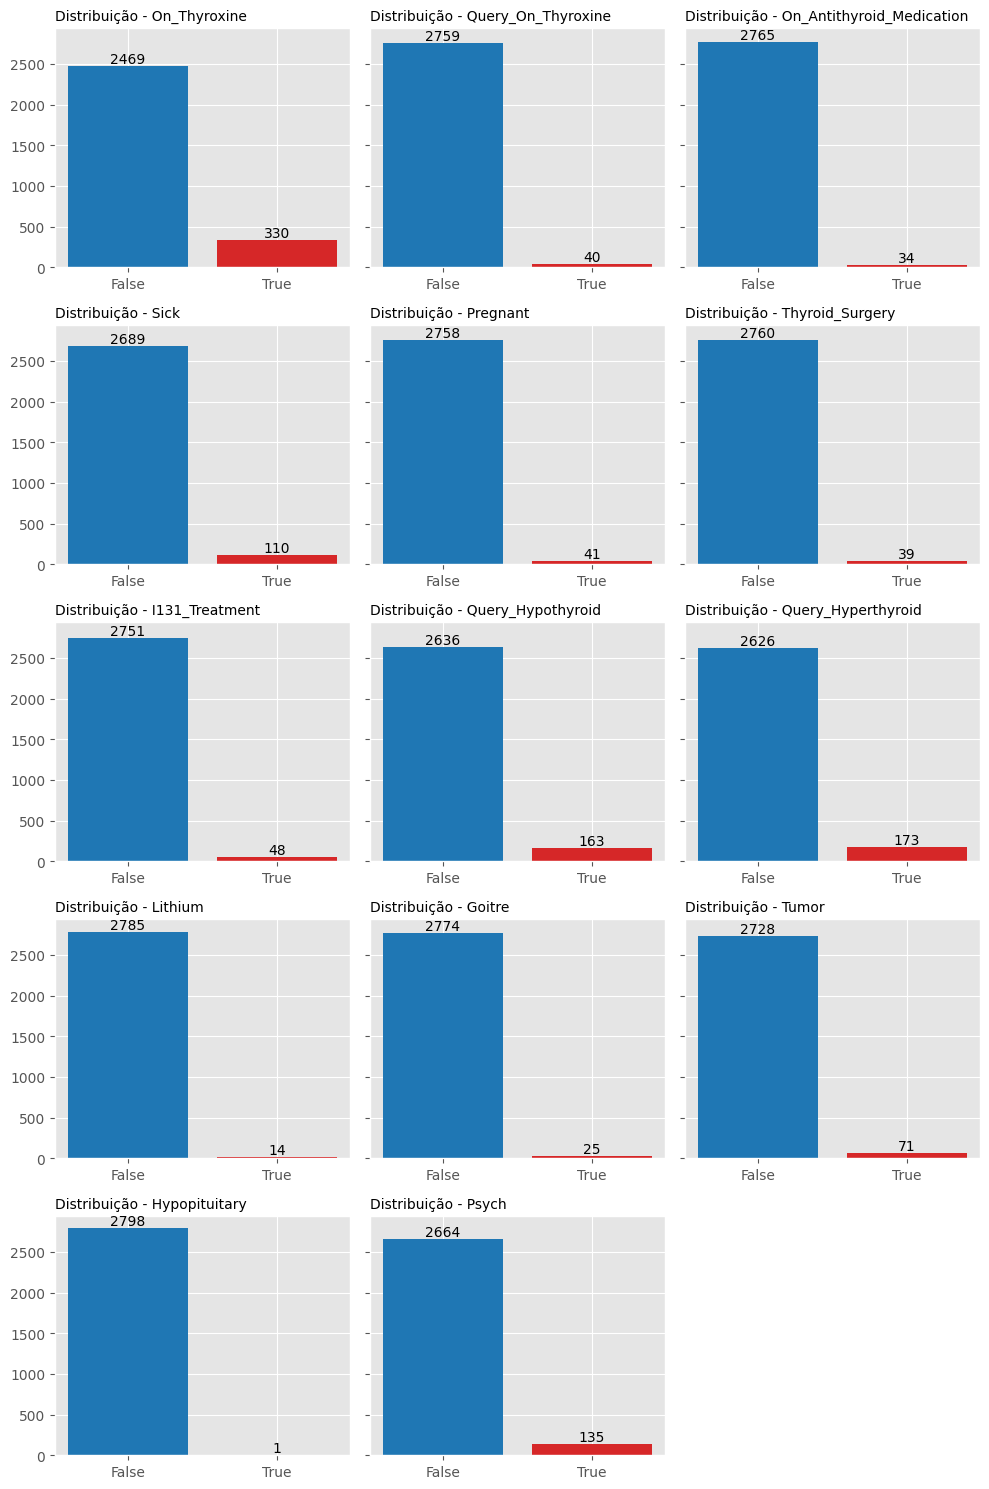

In [10]:
# Exibição Gráfica das Variáveis Booleanas

colunas_bool = ["On_Thyroxine", "Query_On_Thyroxine", "On_Antithyroid_Medication", "Sick", "Pregnant",
                "Thyroid_Surgery", "I131_Treatment", "Query_Hypothyroid", "Query_Hyperthyroid",
                "Lithium", "Goitre", "Tumor", "Hypopituitary", "Psych"]

fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (10, 15), sharey = True)
bar_colors = ['tab:blue', 'tab:red']
ax = ax.flatten()

for idx, col in enumerate(colunas_bool):
    counts = dataframe[col].value_counts()
    bars = ax[idx].bar(counts.index.astype(str), counts.values, color = bar_colors)
    ax[idx].set_title(f"Distribuição - {col}", loc = "left", fontsize = 10)
    ax[idx].bar_label(bars, fmt="%.0f")

for j in range(len(colunas_bool), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Com base nos gráficos anteriores, é possível identificar que menos da metade dos pacientes faz uso da tiroxina, hormônio T4 para a tireoide. Isso condiz com a baixa quantidade de pacientes diagnosticados com disfunções tireoidianas vista anteriormente.

Uma das condutas de tratamento para câncer de tireoide é a remoção completa da glândula com posterior tratamento com iodo radioativo. Pelo gráfico, a quantidade de pessoas que tiveram a tireoide removida é próxima da quantidade de pessoas que fizeram tratamento com iodo radioativo, o que indica possível correlação entre as variáveis.

Demais correlações serão avaliadas nos tópicos a seguir.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [11]:
# Estatísticas Descritivas Básicas

dataframe.describe()

,Age,TSH,T3,TT4,T4U,FTI,TBG
count,2798.000000,2515.000000,2214.000000,2615.000000,2502.000000,2504.000000,0.0
mean,51.848106,4.673491,2.024752,109.066310,0.997855,110.788698,NaN
std,20.463790,21.453613,0.824725,35.397841,0.194409,32.890535,NaN
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,36.000000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,67.000000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


É provável que os valores máximos para Age e TSH sejam *outliers*.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [12]:
# Média dos atributos numéricos do dataset

dataframe.describe().loc['mean']

,mean
Age,51.848106
TSH,4.673491
T3,2.024752
TT4,109.066310
T4U,0.997855
FTI,110.788698
TBG,NaN


Como pode ser visto no conjunto de dados, não existem dados para a coluna TBG, o que possibilita sua remoção do dataset. O eixo X dos histogramas de TSH e Age possuem um grande espaço sem dados numéricos significativos, o que indica a possível presença de *outliers*.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [13]:
# Desvio padrão dos atributos numéricos do dataset

dataframe.describe().loc['std']

,std
Age,20.463790
TSH,21.453613
T3,0.824725
TT4,35.397841
T4U,0.194409
FTI,32.890535
TBG,NaN


O desvio padrão acentuado nas colunas Age, TSH, TT4 e FTI, somados à visualização dos dados no histograma, indica a possível presença de *outliers*, que influenciaram o valor da média e, consequentemente, o valor do desvio padrão. Um gráfico interessante para mostrar o desvio padrão é o gráfico de barras com erro:

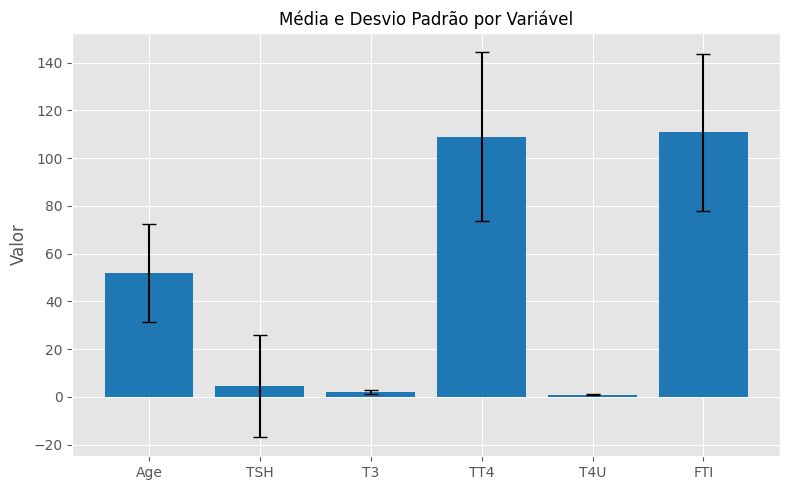

In [14]:
# Gráfico de Barras com Erro

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(figsize = (8, 5))

for i, col in enumerate(colunas_float):
    media = dataframe[col].mean()
    desvio = dataframe[col].std()
    ax.bar(col, media, yerr = desvio, capsize = 5, color="tab:blue")

ax.set_title("Média e Desvio Padrão por Variável", fontsize = 12)
ax.set_ylabel("Valor")

plt.tight_layout()
plt.show()

Como pode ser visto no gráfico de barras com erro exibido anteriormente, os dados de T3 e T4U apresentam desvio padrão pequeno, se comparado aos demais, o que corrobora com a hipótese de presença de *outliers* nos demais dados.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

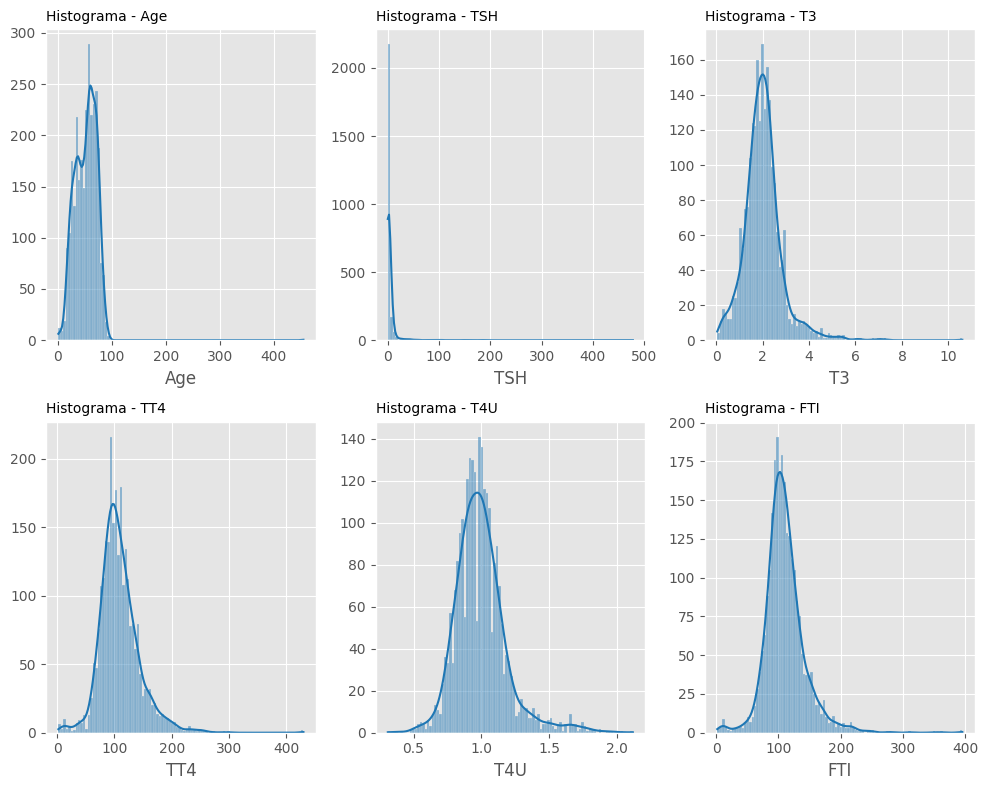

In [20]:
# Histograma para visualizar a distribuição dos valores numéricos

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
ax = ax.flatten()

for idx, col in enumerate(colunas_float):
    dados = dataframe[col].dropna()
    sns.histplot(dados, bins = 100, kde = True, ax = ax[idx], color = "tab:blue")
    ax[idx].set_title(f"Histograma - {col}", loc = "left", fontsize = 10)
    ax[idx].set_ylabel("")

    xmin, xmax = dados.min(), dados.max()
    margem = (xmax - xmin) * 0.05
    ax[idx].set_xlim(xmin - margem, xmax + margem)

for j in range(len(colunas_float), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Analisando os resultados do histograma anterior para as variáveis numéricas, temos:



*   **Age**: Observamos anteriormente a possível presença de *outliers* nos dados de idade. O histograma mostra a distribuição da idade dos pacientes da pesquisa. A curva de densidade estimada (KDE) indica que a distribuição parece bimodal, indicando a presença de duas faixas etárias predominantes na pesquisa. A extensão do KDE para direita do eixo X confirma a presença de outliers na amostra.

*   **TSH**: Observamos anteriormente a possível presença de *outliers* nos dados de TSH. Com relação aos dados de TSH, observa-se que a distribuição é unimodal e que o valor mínimo é 0 (limite inferior do TSH). A extensão do KDE para direita do eixo X confirma a presença de outliers na amostra.

* **T3**: Como observamos no gráfico de barra com erros, o T3 possui desvio padrão pequeno, o que não indica a presença significativa de *outliers* nos dados. Pela curva de densidade estimada (KDE), os dados estão concentrados entre 0 e 4 e a distribuição é unimodal.

* **TT4**: Possui distribuição unimodal e presença de possíveis *outliers* devido a extensão da KDE para direita do eixo X.

* **T4U**: Como observamos no gráfico de barra com erros, o T4U possui desvio padrão pequeno, o que não indica a presença significativa de *outliers* nos dados. Pela curva de densidade estimada (KDE), os dados estão concentrados entre 0,5 e 2 e a distribuição é unimodal.

* **FTI**: Possui distribuição unimodal e presença de possíveis *outliers* devido a extensão da KDE para direita do eixo X.



## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
dataframe.groupby("Class").describe()

Age                                                          TSH  \
           count       mean        std   min   25%   50%   75%    max   count   
Class                                                                           
negative  2627.0  51.048725  20.466417   1.0  35.0  53.0  66.0  455.0  2346.0   
sick       171.0  64.128655  16.062226  18.0  55.0  67.0  76.0   93.0   169.0   

                                                                 T3            \
              mean        std    min   25%  50%  75%    max   count      mean   
Class                                                                           
negative  4.689314  21.874993  0.005  0.45  1.4  2.6  478.0  2045.0  2.117579   
sick      4.453846  14.425553  0.005  0.37  1.5  3.6  143.0   169.0  0.901479   

                                                 TT4                         \
              std   min  25%  50%  75%   max   count        mean        std   
Class                                                                         
negative  0.77767  0.05  1.7  2.0  2.4  10.6  2444.0  110.104910  35.306792   
sick      0.47692  0.05  0.6  0.9  1.0   2.6   171.0   94.222222  33.402673   

                                              T4U                            \
           min   25%    50%    75%    max   count      mean       std   min   
Class                                                                         
negative   2.0  89.0  105.0  126.0  430.0  2336.0  1.009497  0.192859  0.31   
sick      19.0  72.0   87.0  110.0  192.0   166.0  0.834036  0.132656  0.48   

                                         FTI                               \
             25%   50%     75%   max   count        mean        std   min   
Class                                                                       
negative  0.8900  0.99  1.0900  2.12  2338.0  110.662917  32.730514   2.0   
sick      0.7625  0.83  0.9075  1.14   166.0  112.560241  35.123928  17.0   

                                      TBG                               
           25%    50%    75%    max count mean std min 25% 50% 75% max  
Class                                                                   
negative  93.0  107.0  124.0  395.0   0.0  NaN NaN NaN NaN NaN NaN NaN  
sick      93.0  108.0  129.0  219.0   0.0  NaN NaN NaN NaN NaN NaN NaN

### *petal length* por Espécie


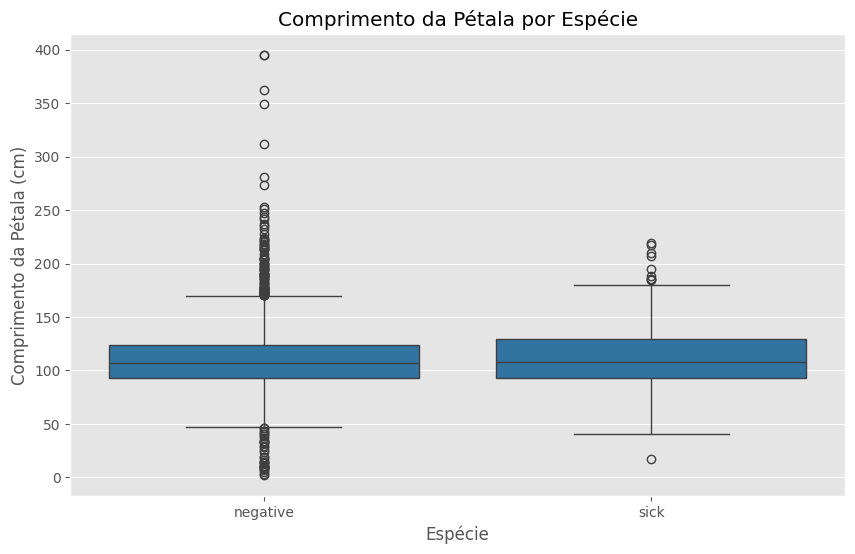

In [ ]:
# Boxplot do comprimento da pétala por espécie

plt.figure(figsize =(10, 6))
sns.boxplot(x = "Class", y = "FTI", data = dataframe, color = "tab:blue")
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

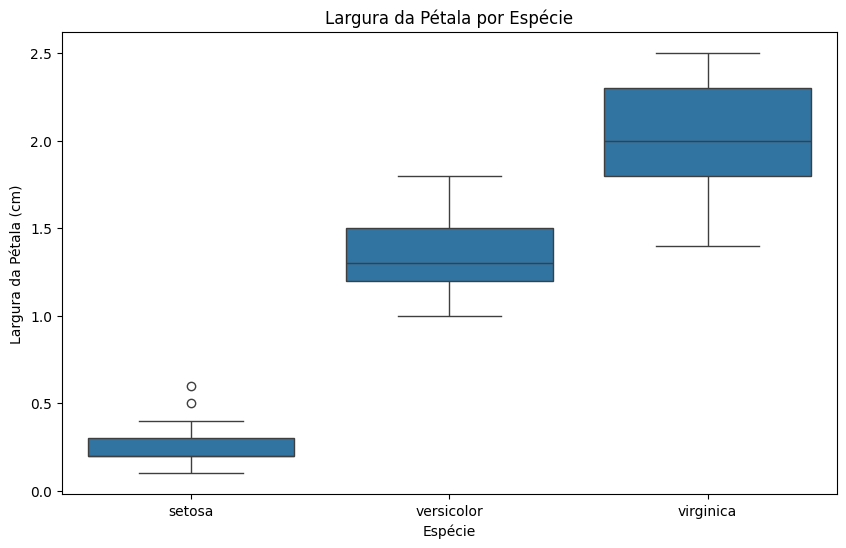

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
dataframe[['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].corr()


Matriz de Correlação:


,Age,TSH,T3,TT4,T4U,FTI
Age,1.000000,-0.059816,-0.244592,-0.052022,-0.163221,0.037614
TSH,-0.059816,1.000000,-0.160860,-0.254775,0.067760,-0.291193
T3,-0.244592,-0.160860,1.000000,0.563848,0.463331,0.351050
TT4,-0.052022,-0.254775,0.563848,1.000000,0.434184,0.795246
T4U,-0.163221,0.067760,0.463331,0.434184,1.000000,-0.173059
FTI,0.037614,-0.291193,0.351050,0.795246,-0.173059,1.000000


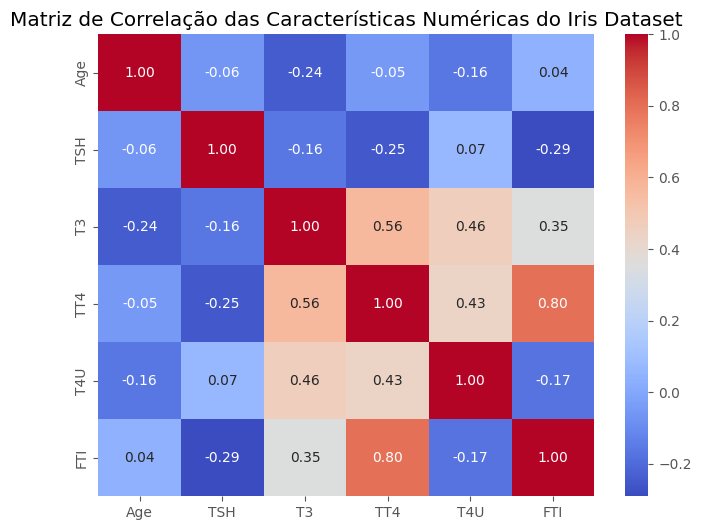

In [ ]:
plt.figure(figsize=(8, 6))

# mapa de calor das variáveis numéricas

sns.heatmap(dataframe[['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


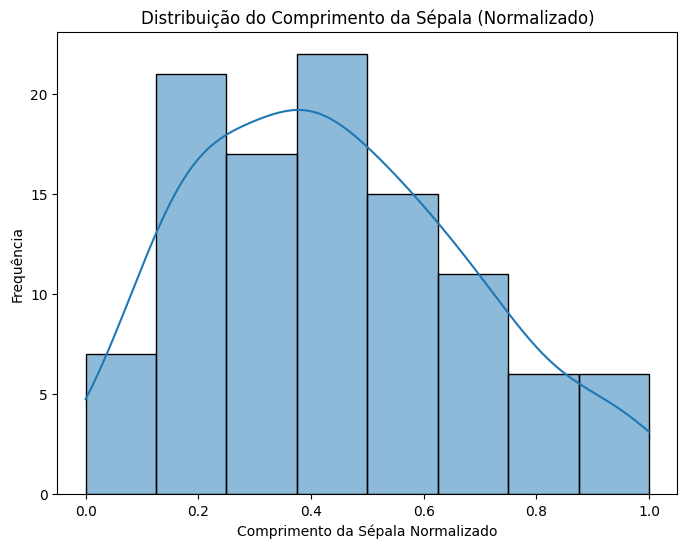

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


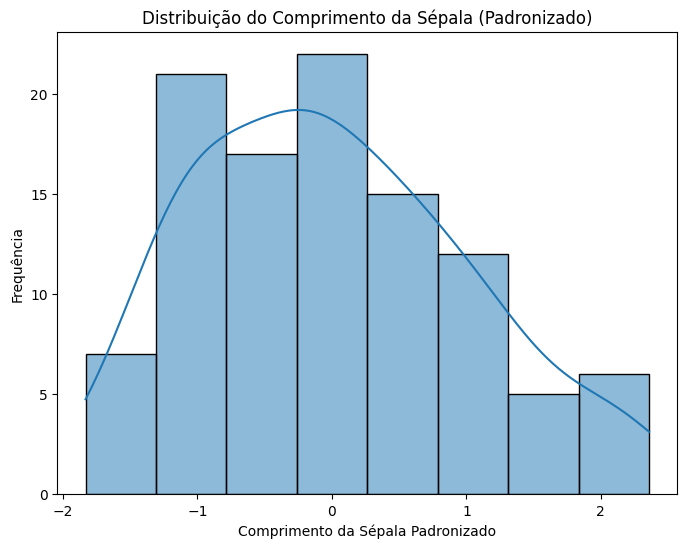

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.